In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [20]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
# check data types

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [23]:
# converting columns having 0 & 1 values to the object type

# Select columns with 0 and 1 values
cols_to_convert = data.columns[(data == 0).any() & (data == 1).any()]

# Convert these columns to object type
data[cols_to_convert] = data[cols_to_convert].astype('object')

# Verify the changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


In [24]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [25]:
# Check for duplicated rows

data.duplicated().sum()


0

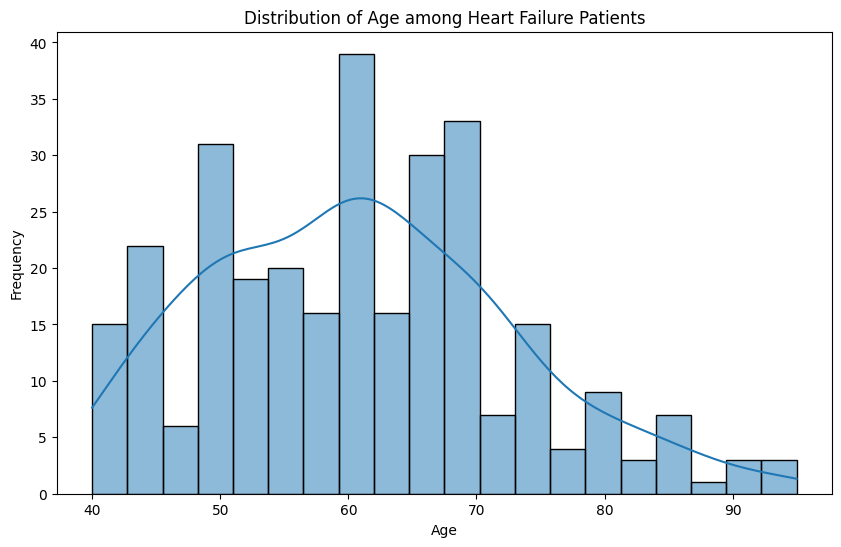

In [41]:
# Question: What is the distribution of age among heart failure patients in the datase

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Insights**
*   The distribution of age appears right sckewed.
*  This suggests that there's a higher concentration of patients in the older age groups.
* there is less petients above 70 years which causes heart failure as compare to age group between 50-70 years



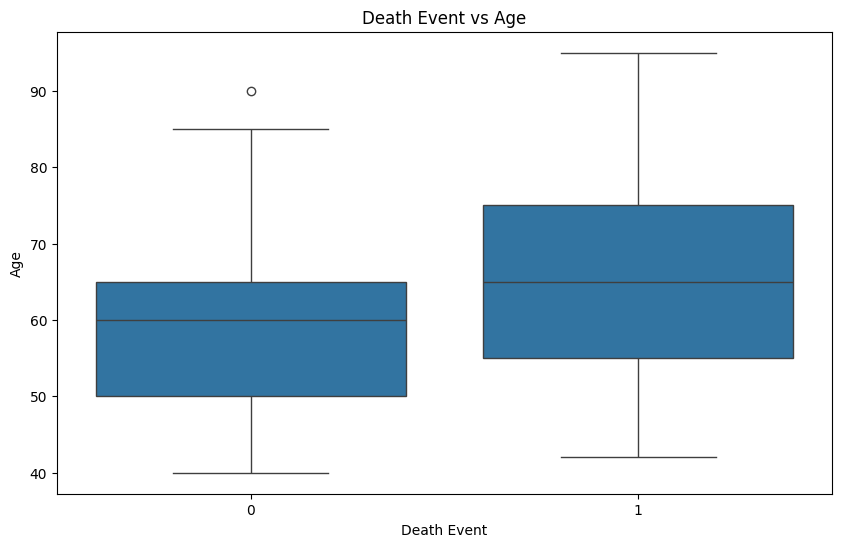

In [43]:
# Question: How does the death rate vary with age

plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Death Event vs Age')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()


 **Insights**
* The box plot shows that the median age of patients who died is higher than those who survived.
* There is a significant difference in the age distribution between the two groups.
* This indicates that age might be a strong predictor of death

In [44]:
# Question: What is the percentage of male and female patients in the dataset?

# Calculate the percentage of male and female patients
gender_counts = data['sex'].value_counts(normalize=True) * 100
print(gender_counts)


sex
1    64.882943
0    35.117057
Name: proportion, dtype: float64


  **Insights**
*  The dataset contains a higher proportion of male patients compared to female patients.
*  This suggests that heart failure might be more prevalent in males based on this dataset.
*  However, it's important to remember that this is just a snapshot of the data and further analysis is needed to establish definitive conclusions about gender differences in heart failure.

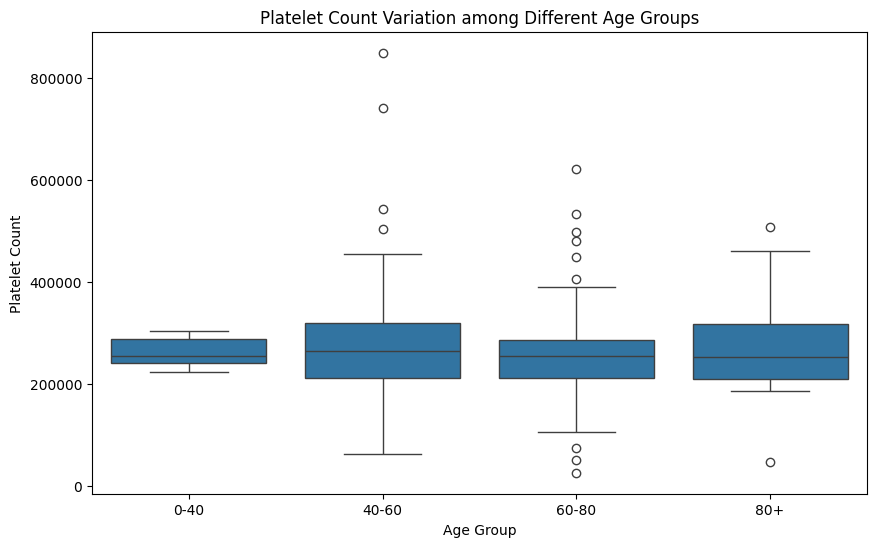

In [45]:
# Question: How does the platelet count vary among different age groups

# Create age groups
data['age_group'] = pd.cut(data['age'], bins=[0, 40, 60, 80, 100], labels=['0-40', '40-60', '60-80', '80+'])

# Plot the platelet count variation among different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='platelets', data=data)
plt.title('Platelet Count Variation among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()


**Insights**:
* There seems to be a slight trend of lower platelet counts in older age groups.
* The variability in platelet counts within each age group is quite high.


Correlation between creatinine and sodium levels: 0.05955015583372577


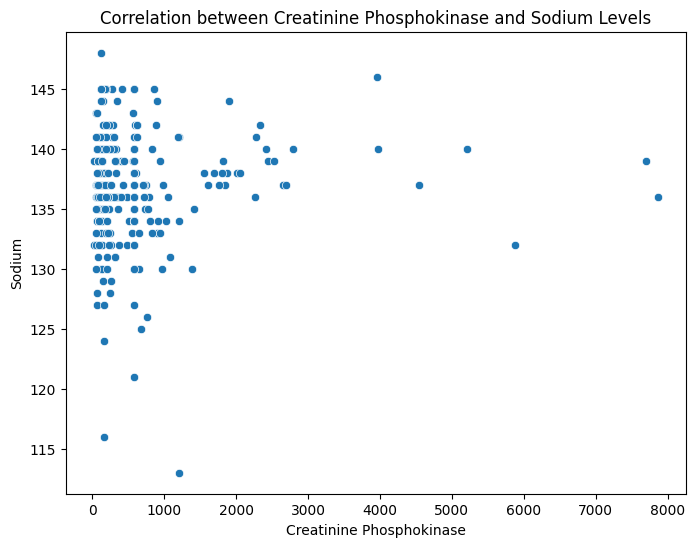

In [46]:
# Question: Is there a correlation between creatinine and sodium levels in the blood

# Calculate the correlation between creatinine and sodium levels
correlation = data['creatinine_phosphokinase'].corr(data['serum_sodium'])
print(f"Correlation between creatinine and sodium levels: {correlation}")

# Visualize the correlation with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='creatinine_phosphokinase', y='serum_sodium', data=data)
plt.title('Correlation between Creatinine Phosphokinase and Sodium Levels')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Sodium')
plt.show()


**Insights**:
* The correlation between creatinine phosphokinase and serum sodium levels is weak and negative.
* This suggests that there is not a strong linear relationship between these two variables.
*  A lower serum sodium level might be slightly associated with higher creatinine phosphokinase levels, but further investigation is needed to understand the underlying cause.


sex  high_blood_pressure
0    0                      58.095238
     1                      41.904762
1    0                      68.556701
     1                      31.443299
Name: proportion, dtype: float64


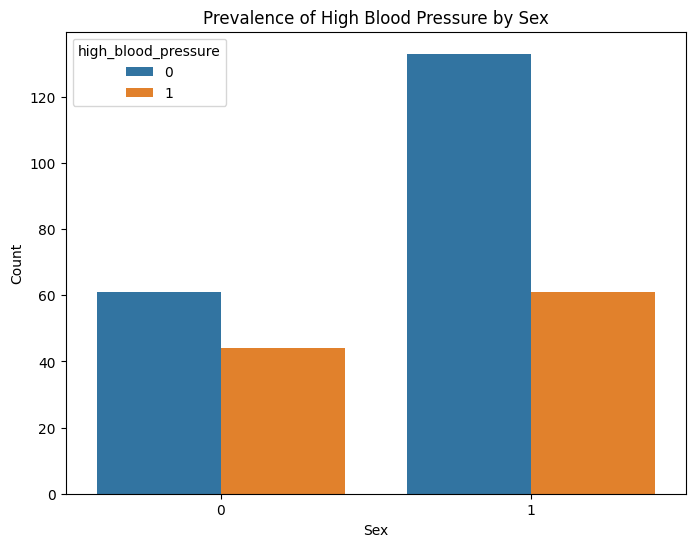

In [47]:
# Question : How does the prevalence of high blood pressure differ between male and female patients

# Calculate the prevalence of high blood pressure for male and female patients
high_bp_by_sex = data.groupby('sex')['high_blood_pressure'].value_counts(normalize=True) * 100

# Print the results
print(high_bp_by_sex)

# Visualize the prevalence of high blood pressure by sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='high_blood_pressure', data=data)
plt.title('Prevalence of High Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


**Insights**:
*  The prevalence of high blood pressure appears to be slightly higher in males compared to females.
*  This could indicate a potential gender-related difference in the risk factors or susceptibility to hypertension.

smoking  DEATH_EVENT
0        0              67.487685
         1              32.512315
1        0              68.750000
         1              31.250000
Name: proportion, dtype: float64


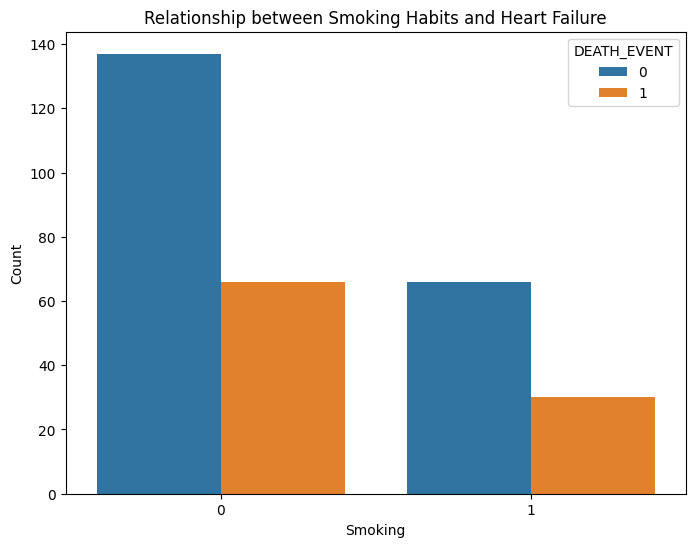

In [48]:
# Question: What is the relationship between smoking habits and the occurrence of heart failure

# Calculate the prevalence of heart failure for smokers and non-smokers
hf_by_smoking = data.groupby('smoking')['DEATH_EVENT'].value_counts(normalize=True) * 100

# Print the results
print(hf_by_smoking)

# Visualize the relationship between smoking and heart failure
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)
plt.title('Relationship between Smoking Habits and Heart Failure')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()


**Insights**:
-  There appears to be a slightly higher prevalence of death events among smokers compared to non-smokers.
-  However, the difference is not very pronounced.  
-  This suggests that while smoking might be a risk factor for heart failure, other factors like age, gender, and underlying health conditions likely play a more significant role.


<ipython-input-49-f71cbc19008e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_event_by_age_group = data.groupby('age_group')['DEATH_EVENT'].mean() * 100


age_group
0-40           0.0
40-60    28.387097
60-80    32.773109
80+      72.222222
Name: DEATH_EVENT, dtype: object


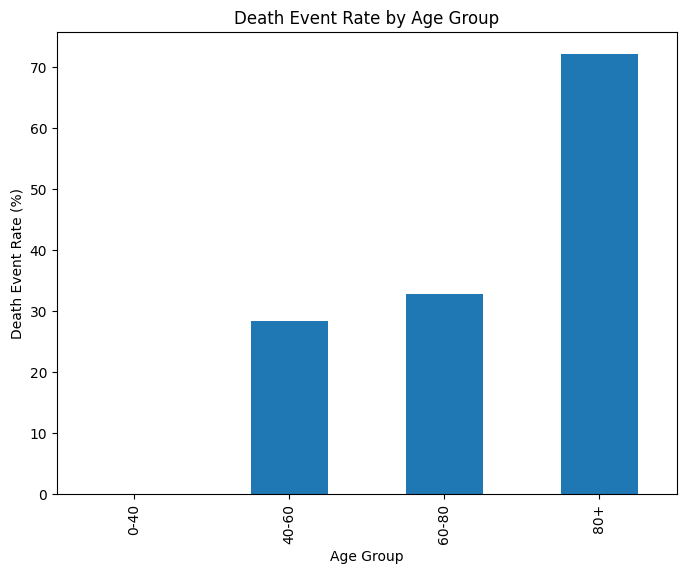

In [49]:
# Question : Are there any noticeable patterns in the distribution of death events across different age groups

# Group data by age group and calculate the death event rate
death_event_by_age_group = data.groupby('age_group')['DEATH_EVENT'].mean() * 100

# Print the results
print(death_event_by_age_group)

# Visualize the death event rate by age group
plt.figure(figsize=(8, 6))
death_event_by_age_group.plot(kind='bar')
plt.title('Death Event Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Event Rate (%)')
plt.show()


 **Insights**:
- The death event rate generally increases with age.
- Patients in the 80+ age group have the highest death event rate.
- This suggests that age is a significant risk factor for heart failure.


In [50]:
# Question: Is there any significant difference in ejection fraction between patients with and without diabetes

import scipy.stats as stats

# Separate ejection fraction values for patients with and without diabetes
ef_with_diabetes = data[data['diabetes'] == 1]['ejection_fraction']
ef_without_diabetes = data[data['diabetes'] == 0]['ejection_fraction']

# Perform a t-test to compare the means
t_stat, p_value = stats.ttest_ind(ef_with_diabetes, ef_without_diabetes)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")


T-statistic: -0.08358970647234736
P-value: 0.9334389630426103
There is no significant difference in ejection fraction between patients with and without diabetes.


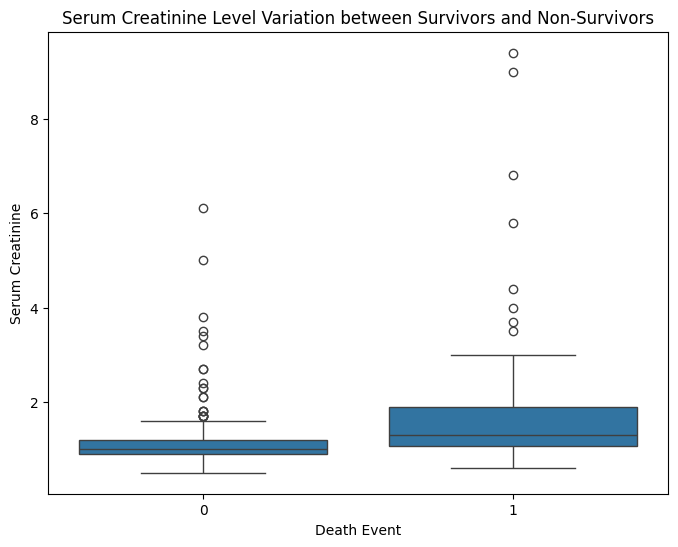

T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07
There is a significant difference in serum creatinine levels between survivors and non-survivors.


In [51]:
# Question: How does the serum creatinine level vary between patients who survived and those who did not?

# Create a box plot to visualize the serum creatinine level variation between survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data)
plt.title('Serum Creatinine Level Variation between Survivors and Non-Survivors')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()

# Perform a t-test to compare the means of serum creatinine levels between the two groups
survivors_creatinine = data[data['DEATH_EVENT'] == 0]['serum_creatinine']
non_survivors_creatinine = data[data['DEATH_EVENT'] == 1]['serum_creatinine']
t_stat, p_value = stats.ttest_ind(survivors_creatinine, non_survivors_creatinine)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in serum creatinine levels between survivors and non-survivors.")
else:
    print("There is no significant difference in serum creatinine levels between survivors and non-survivors.")
